outer diameter in mm: 66661
inner diameter in mm: 3
packed bed height in cm: 3
length of rashig in cm: 232
Diameter of column in mm: 131
time in s: 1
enter manometer readings in cm   : 21 12 45 4 5 55
volumetric flow rate in LPM       : 26 55 852 64 555 56 55


   flow rate  pressure drop  Superficial Velocity(Vo)  \
0   0.000433    -51914520.0                  0.032151   
1   0.000917    -29665440.0                  0.068011   
2   0.014200   -111245400.0                  1.053552   
3   0.001067     -9888480.0                  0.079140   
4   0.009250    -12360600.0                  0.686293   
5   0.000933   -135966600.0                  0.069248   

   Particle Reynold Number (Rep)  Friction factor(Fp)    one by Rep  
0                   6.807210e+06        -1.277729e+11  1.469031e-10  
1                   1.439987e+07        -1.631631e+10  6.944509e-11  
2                   2.230670e+08        -2.549761e+08  4.482958e-12  
3                   1.675621e+07        -4.016671e+09  5.967937e-11  
4                   1.453077e+08        -6.676521e+07  6.881946e-12  
5                   1.466168e+07        -7.213612e+10  6.820500e-11  


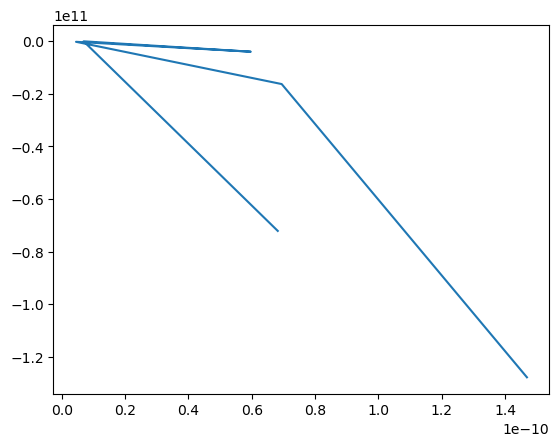

Table has been saved to kalyan_code.xlsx


In [17]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
s=0.33
g=9.81
gc=1
mue=10**-3
x=6
Do=float(input("outer diameter in mm:"))
Do=Do*(10**-3)
Di=float(input("inner diameter in mm:"))
Di=Di*(10**-3)
L=float(input("packed bed height in cm:"))
L=L*(10**-2)
h=float(input("length of rashig in cm:"))
h=h*(10**-2)
D=float(input("Diameter of column in mm:"))
D=D*(10**-3)
t=float(input("time in s:"))
#vw=float(input("volume of water:"))
#vp=float(input("volume of packings:"))
#TV=float(input("Total Volume:"))
Pa=13600#density of mercury
Pb=1000#density of water
l1,l2,l3,l4,l5,l6=[],[],[],[],[],[]
n=6
i=0
Rm=list(map(float,input("enter manometer readings in cm   :").split()))[:6]
Q=list(map(float,input("volumetric flow rate in LPM       :").split()))[:6]
while(n>0) and (i<6):
    Rm1=Rm[i]*(10*-2)
    q=(Q[i]*10**-3)/60   
    l1.append(q)
    A=(math.pi*D**2)/4
    Vo=q/A
    l3.append(Vo)
    Sp=math.pi*(Do+Di)*(h+t)
    Vp=math.pi*((Do**2)-(Di**2))*(h/4)
    Dp=(6*Vp)/(s*Sp)
    dP=Rm1*(Pa-Pb)*g
    l2.append(dP)
    Rep=(Dp*Vo*Pb)/mue
    obRep=(1/Rep)*(10**-3)
    l4.append(Rep)
    l6.append(obRep)
    E=0.694
    Fp=(s*dP*Dp*(E**3)*gc)/(Pb*L*(Vo**2)*(1-E))
    l5.append(Fp) 
    x=x-1
    i=i+1
df = pd.DataFrame({'flow rate':l1,'pressure drop':l2,'Superficial Velocity(Vo)':l3,'Particle Reynold Number (Rep)':l4,'Friction factor(Fp)':l5,'one by Rep':l6})
print(df)
xpoints = np.array(l6)
ypoints = np.array(l5)
plt.plot(xpoints, ypoints)
plt.show()
output_file = "kalyan_code.xlsx"
df.to_excel(output_file, index=False)
print(f"Table has been saved to {output_file}")